In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from matplottoy.data import simplex
from matplottoy.encoders import (color, position)
from matplottoy.artists import point, line

import utils

spath = Path("../../../draft/figures/code/")

In [5]:
data = simplex.VertexSimplex(size=200)

In [6]:
data.view('vertex').keys()

dict_keys(['index', 'v1', 'v2', 'v3', 'v4'])

In [7]:
cmap = {'true':'deeppink', 'false':'deepskyblue'}
transforms = {'y': ('v2', position.Identity()),       
              'x': ('v4', position.Identity()),
            'facecolors': ('v3', color.Categorical( {'true':'deeppink', 'false':'deepskyblue'})), 
             's':.01}

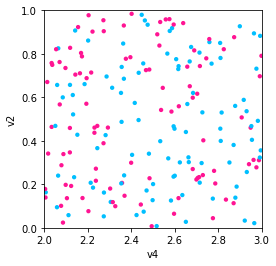

In [8]:
fig, ax = plt.subplots()

artist = point.Point(data, transforms)
ax.add_artist(artist)
ax.set(xlim = utils.mnx(data.FB.F[transforms['x'][0]]['range']),
       ylim = utils.mnx(data.FB.F[transforms['y'][0]]['range']), 
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')
fig.savefig(spath/"scatter_0.png")

[(2.0, 3.0), (0.0, 1.0), Text(0.5, 0, 'v4'), Text(0, 0.5, 'v2'), None]

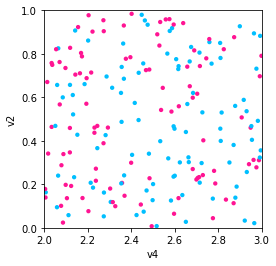

In [9]:
### fails on facecolors
fig, ax = plt.subplots()

artist = point.Point(data, transforms)
ax.add_artist(artist)
ax.set(xlim = utils.mnx(data.FB.F[transforms['x'][0]]['range']),
       ylim = utils.mnx(data.FB.F[transforms['y'][0]]['range']), 
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')


AssertionError: 

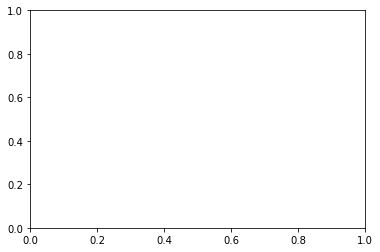

In [10]:
fig, ax = plt.subplots()
artist = line.Line(data, transforms)
